<a href="https://colab.research.google.com/github/Zouzzou21/TIP-Projet-IRM-Cerveau/blob/main/TUMOR_DETECTION-v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import jeux de donnée

#### Import des images d'entrainement et decompression du fichier zip.

In [1]:
!rm -rf FINAL*
!wget https://github.com/Zouzzou21/TIP-Projet-IRM-Cerveau/raw/main/FINAL.zip
!unzip FINAL.zip

--2023-11-07 21:01:47--  https://github.com/Zouzzou21/TIP-Projet-IRM-Cerveau/raw/main/FINAL.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Zouzzou21/TIP-Projet-IRM-Cerveau/main/FINAL.zip [following]
--2023-11-07 21:01:47--  https://raw.githubusercontent.com/Zouzzou21/TIP-Projet-IRM-Cerveau/main/FINAL.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23166270 (22M) [application/zip]
Saving to: ‘FINAL.zip’

FINAL.zip           100%[===================>]  22.09M  --.-KB/s    in 0.1s    

2023-11-07 21:01:47 (156 MB/s) - ‘FINAL.zip’ saved [23166270/23166270]

Archive:  FINAL.zip
   creating: 

#### Import des images de test et decompression du fichier zip.

In [2]:
!rm -rf TEST*
!wget https://github.com/Zouzzou21/TIP-Projet-IRM-Cerveau/raw/main/TEST.zip
!unzip TEST.zip

--2023-11-07 21:01:48--  https://github.com/Zouzzou21/TIP-Projet-IRM-Cerveau/raw/main/TEST.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Zouzzou21/TIP-Projet-IRM-Cerveau/main/TEST.zip [following]
--2023-11-07 21:01:48--  https://raw.githubusercontent.com/Zouzzou21/TIP-Projet-IRM-Cerveau/main/TEST.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14953762 (14M) [application/zip]
Saving to: ‘TEST.zip’

TEST.zip            100%[===================>]  14.26M  --.-KB/s    in 0.1s    

2023-11-07 21:01:48 (124 MB/s) - ‘TEST.zip’ saved [14953762/14953762]

Archive:  TEST.zip
   creating: TEST/g

### Python

#### Import python

In [3]:
import os
import io
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow import keras
import cv2
#from google.colab import files
import numpy as np
import pathlib
from os import walk
import pandas as pd
from PIL import Image, ImageEnhance, ImageOps
import sys
#import datetime
from tensorflow.keras import layers
import keras
import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

#### Recupération du jeux de données

In [4]:
data_dir = pathlib.Path('/content/FINAL')

# print(data_dir)
# print(os.path.abspath(data_dir))

image_count = len(list(data_dir.glob('*/*')))
print("Number of images in the dataset:", image_count)

Number of images in the dataset 1176


#### Mise en forme des images (size et colorimetrie)

In [5]:
batch_size = 5
img_width = img_height = 500

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print("Name of tumor class:", class_names)

Found 1176 files belonging to 4 classes.
Using 941 files for training.
Found 1176 files belonging to 4 classes.
Using 235 files for validation.
Name of tumor class: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


#### Affichage des differentes photos de tumeurs

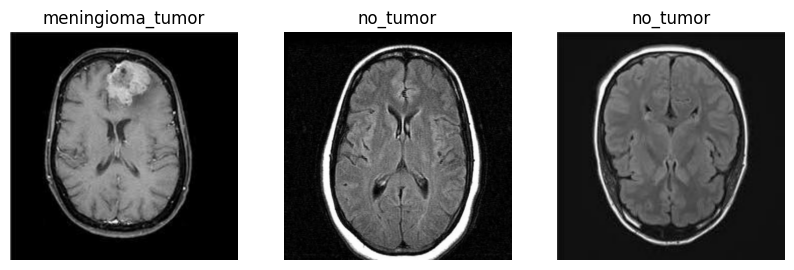

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#### Création du réseau de neuronnes

In [7]:
num_classes = 4

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

logdir = "logs"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1, write_images=True)
epochs = 10

model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    callbacks=[tensorboard_callback]
)

Epoch 1/10
189/189 [==============================] - 34s 116ms/step - loss: 1.0392 - accuracy: 0.5409 - val_loss: 0.9458 - val_accuracy: 0.6511
Epoch 2/10
189/189 [==============================] - 22s 118ms/step - loss: 0.7589 - accuracy: 0.7067 - val_loss: 0.9618 - val_accuracy: 0.6809
Epoch 3/10
189/189 [==============================] - 21s 111ms/step - loss: 0.5515 - accuracy: 0.8045 - val_loss: 0.7643 - val_accuracy: 0.7489
Epoch 4/10
189/189 [==============================] - 21s 111ms/step - loss: 0.2759 - accuracy: 0.9044 - val_loss: 0.9372 - val_accuracy: 0.7660
Epoch 5/10
189/189 [==============================] - 22s 113ms/step - loss: 0.1484 - accuracy: 0.9437 - val_loss: 1.7716 - val_accuracy: 0.7830
Epoch 6/10
189/189 [==============================] - 22s 114ms/step - loss: 0.1550 - accuracy: 0.9511 - val_loss: 1.2310 - val_accuracy: 0.7957
Epoch 7/10
189/189 [==============================] - 22s 117ms/step - loss: 0.0925 - accuracy: 0.9681 - val_loss: 1.3876 - val_ac

#### Affichage du sommaire du model de neuronnes

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 500, 500, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 497, 497, 128)     6272      
                                                                 
 max_pooling2d (MaxPooling2  (None, 248, 248, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 245, 245, 64)      131136    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 122, 122, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 119, 119, 32)      3

#### Chargement des images de test

In [9]:
data_dir_TEST = pathlib.Path('/content/TEST')
# print(data_dir_TEST)
# print(os.path.abspath(data_dir_TEST))
image_count_TEST = len(list(data_dir_TEST.glob('*/*')))
print("Number of test images:", image_count_TEST)

##REPERTOIRE DES CLASSES
no_tumor_dir = os.path.join('/content/TEST/no_tumor')
glioma_tumor_dir = os.path.join('/content/TEST/glioma_tumor/')
meningioma_tumor_dir = os.path.join('/content/TEST/meningioma_tumor')
pituitary_tumor_dir = os.path.join('/content/TEST/pituitary_tumor')

##OBTENIR LE NOMBRE D'IRM EN FONCTION DE CHAQUE CLASSE
nbrPasTumeur = len(os.listdir(no_tumor_dir))
nbrGliomaTumeur = len(os.listdir(glioma_tumor_dir))
nbrMeningiomaTumeur = len(os.listdir(meningioma_tumor_dir))
nbrPituitaryTumeur = len(os.listdir(pituitary_tumor_dir))

##MISE EN PLACE DES COMPTEURS POUR DETERMINER LES DETECTIONS PAR RAPPORT AU RESEAU
CompteurGlioma = CompteurPasTumeur = CompteurMeningioma = CompteurPituitary = 0

Number of test images: 529


#### Test du model avec les images de test

In [10]:
##POUR CHAQUE IRM, ON L'ENVOIE DANS LE RESEAU DE NEURONE POUR DETERMINER SA CLASSE
CompteurLogique = nbrErreur = interaction = percentErreur = 0
liste_Erreur_10ech_percent = liste_Erreur_10ech = []

for dossier_parent, sous_repertoires, fichiers in os.walk(data_dir_TEST):
    with HiddenPrints():
      for nom_fichier in fichiers:
          CompteurLogique = CompteurLogique + 1
          interaction = interaction + 1
          chemin_image = os.path.join(dossier_parent, nom_fichier)

          if nom_fichier.lower().endswith(('.png', '.jpg', '.jpeg')):

            image_to_predict_RGB = Image.open(chemin_image).convert('RGB')
            image_to_predict_GRAY = cv2.cvtColor(np.array(image_to_predict_RGB), cv2.COLOR_RGB2GRAY)

            image_to_predict = np.array(image_to_predict_RGB)
            image_to_predict = cv2.resize(image_to_predict, (img_height, img_width))
            image_to_predict = np.expand_dims(image_to_predict, axis=0)
            ClassProbability = model.predict(image_to_predict)

            ##DETERMINER LA PROBABILITE LA PLUS FORTE
            numpy_array = np.array(ClassProbability)

            ##OBTENIR L'INDEX OU LA PROBABILITE EST LA PLUS FORTE
            val = np.argmax(numpy_array)

          ##EN FONCTION DE LA VALEUR MAX DE PROBABILITE DANS CLASSPROBABILITY ON ESTIME SA CLASSE (FIABILITE DIFFERENTE DE 100%, C'EST POUR CELA QU'ON ESTIME)
          if val == 0:
            CompteurGlioma = CompteurGlioma + 1
          elif val == 1 :
            CompteurMeningioma = CompteurMeningioma + 1
          elif val == 2  :
            CompteurPasTumeur = CompteurPasTumeur + 1
          elif val == 3 :
            CompteurPituitary = CompteurPituitary + 1

          if dossier_parent == "/content/TEST/glioma_tumor":
            if CompteurLogique == len(os.listdir(glioma_tumor_dir)):
              CompteurLogique = CompteurGlioma = CompteurMeningioma = CompteurPasTumeur = CompteurPituitary = 0
              break
            elif CompteurLogique != CompteurGlioma :
              CompteurGlioma = CompteurGlioma + 1
              nbrErreur = nbrErreur + 1

          elif dossier_parent == "/content/TEST/no_tumor":
            if CompteurLogique == len(os.listdir(no_tumor_dir)):
              CompteurLogique = CompteurGlioma = CompteurMeningioma = CompteurPasTumeur = CompteurPituitary = 0
              break
            elif CompteurLogique != CompteurPasTumeur :
              CompteurPasTumeur = CompteurPasTumeur + 1
              nbrErreur = nbrErreur + 1

          elif dossier_parent == "/content/TEST/pituitary_tumor":
            if CompteurLogique == len(os.listdir(pituitary_tumor_dir)):
              CompteurLogique = CompteurGlioma = CompteurMeningioma = CompteurPasTumeur = CompteurPituitary = 0
              break
            elif CompteurLogique != CompteurPituitary :
              CompteurPituitary = CompteurPituitary + 1
              nbrErreur = nbrErreur + 1

          elif dossier_parent == "/content/TEST/meningioma_tumor":
            if CompteurLogique == len(os.listdir(meningioma_tumor_dir)):
              CompteurLogique = CompteurGlioma = CompteurMeningioma = CompteurPasTumeur = CompteurPituitary = 0
              break
            elif CompteurLogique != CompteurMeningioma :
              CompteurMeningioma = CompteurMeningioma + 1
              nbrErreur = nbrErreur + 1

          if interaction % 10 == 0:
            liste_Erreur_10ech.append(nbrErreur)
            #percentErreur = (nbrErreur/10)*100
            #liste_Erreur_10ech_percent.append(percentErreur)
            nbrErreur = 0
    print("List of errors every 10 samples:",liste_Erreur_10ech)

Liste d'erreur: []
Liste d'erreur: [2, 1, 4, 3, 0, 1, 1, 3, 2, 2, 2, 2]
Liste d'erreur: [2, 1, 4, 3, 0, 1, 1, 3, 2, 2, 2, 2, 4, 3, 6, 8, 1, 5, 6, 1, 4, 6, 2, 7, 5, 5]
Liste d'erreur: [2, 1, 4, 3, 0, 1, 1, 3, 2, 2, 2, 2, 4, 3, 6, 8, 1, 5, 6, 1, 4, 6, 2, 7, 5, 5, 4, 2, 5, 3, 5, 4, 5, 4, 2, 2, 4]
Liste d'erreur: [2, 1, 4, 3, 0, 1, 1, 3, 2, 2, 2, 2, 4, 3, 6, 8, 1, 5, 6, 1, 4, 6, 2, 7, 5, 5, 4, 2, 5, 3, 5, 4, 5, 4, 2, 2, 4, 1, 1, 2, 1, 4, 1, 3, 3, 7, 3, 4, 0, 2, 2]


#### Graphique du taux d'erreurs du model.

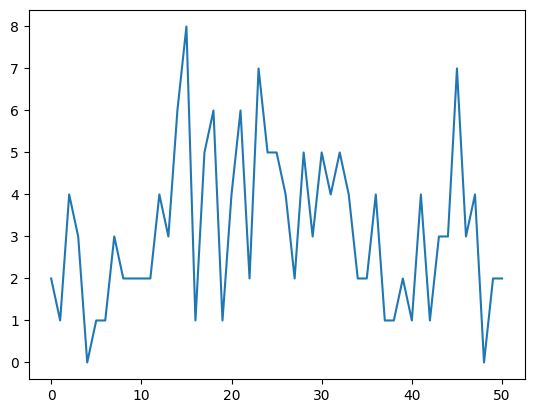

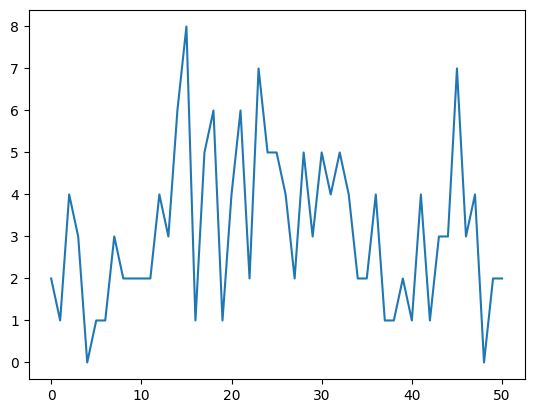

The error rate is:30.245746691871457
The success rate is:69.75425330812854


In [11]:
#SCHEMA DES ERREURS
plt.plot(liste_Erreur_10ech)
plt.show()

plt.plot(liste_Erreur_10ech_percent)
plt.show()

nbrErreurTotal = 0

nbrTotalImages = nbrGliomaTumeur + nbrMeningiomaTumeur + nbrPasTumeur + nbrPituitaryTumeur
for e in liste_Erreur_10ech:
  nbrErreurTotal = nbrErreurTotal + int(e)
ratio = nbrErreurTotal / nbrTotalImages
pourcentageErreur = ratio * 100
pourcentageReussite = 100 - pourcentageErreur
print("The error rate is:" + str(pourcentageErreur) + "\n"
      "The success rate is:" + str(pourcentageReussite)
     )


##AFFICHAGE DES RESULTATS
#print("Glioma = " + str(CompteurGlioma) + "\n"
#      "Meningioma = " + str(CompteurMeningioma) + "\n"
#      "Pas de tumeur = " + str(CompteurPasTumeur) + "\n"
#      "Pituitary = " + str(CompteurPituitary) + "\n"
#      )

##DIFFERENCE OBTENUE
#diffPasTumeur = nbrPasTumeur - CompteurPasTumeur
#diffMeningiomaTumeur = nbrMeningiomaTumeur - CompteurMeningioma
#diffGliomaTumeur = nbrGliomaTumeur - CompteurGlioma
#diffPituitaryTumeur = nbrPituitaryTumeur - CompteurPituitary

##AFFICHAGE DES ERREURS
#print(str(diffGliomaTumeur))
#print(str(diffMeningiomaTumeur))
#print(str(diffPasTumeur))
#print(str(diffPituitaryTumeur))